# Pulsar Emission Data Analysis

In [59]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from scipy import stats
import statistics
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [60]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [61]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar6 = pd.read_csv("Data/J0835-4510.pulses", sep = ' ', header = None, names = colnames)

In [62]:
pulsar6.shape

(1331, 3)

In [63]:
pulsar6.head(25)

,Pulse Number,Brightness,Uncertainty
0,1,0.984043,0.053831
1,2,2.487928,0.048796
2,3,1.690295,0.025639
3,4,1.196142,0.039539
4,5,1.979783,0.041460
5,6,2.297645,0.054210
6,7,2.322135,0.043554
7,8,2.289047,0.049957
8,9,2.442574,0.025110
9,10,2.136332,0.022712


In [64]:
pulsar6.describe()

,Pulse Number,Brightness,Uncertainty
count,1331.000000,1331.000000,1331.000000
mean,666.000000,2.248107,0.039495
std,384.370915,0.591161,0.013056
min,1.000000,0.633413,0.012888
25%,333.500000,1.825375,0.030223
50%,666.000000,2.255182,0.037513
75%,998.500000,2.682259,0.046771
max,1331.000000,4.050718,0.098902


In [65]:
pulsar6["Brightness"].describe()

count    1331.000000
mean        2.248107
std         0.591161
min         0.633413
25%         1.825375
50%         2.255182
75%         2.682259
max         4.050718
Name: Brightness, dtype: float64

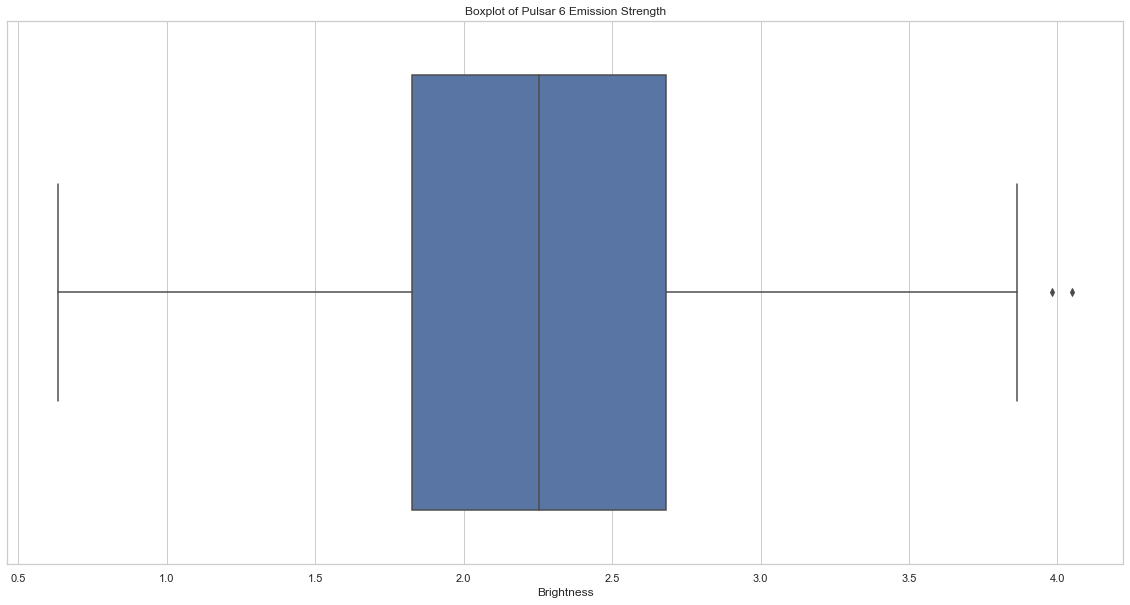

In [66]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

In [67]:
#numpy method of outlier removal

pulsar6npcleaned = pulsar6[(np.abs(stats.zscore(pulsar6["Brightness"])) <3)]
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty
0,1,0.984043,0.053831
1,2,2.487928,0.048796
2,3,1.690295,0.025639
3,4,1.196142,0.039539
4,5,1.979783,0.041460
...,...,...,...
1326,1327,1.842016,0.028216
1327,1328,1.547695,0.024030
1328,1329,2.797312,0.035090
1329,1330,3.351977,0.052178


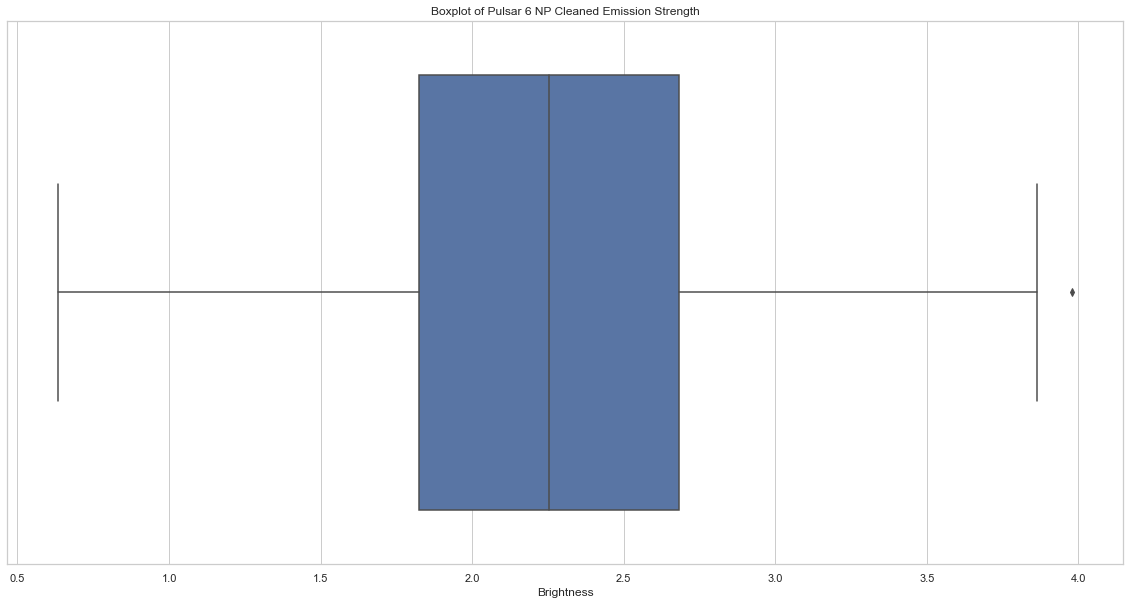

In [68]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=pulsar6npcleaned["Brightness"]).set_title("Boxplot of Pulsar 6 NP Cleaned Emission Strength")

In [69]:
pulsar6npcleaned["Brightness"].describe()

count    1330.000000
mean        2.246752
std         0.589311
min         0.633413
25%         1.824933
50%         2.255085
75%         2.681948
max         3.980586
Name: Brightness, dtype: float64

In [70]:
pulsar6npcleaned["Brightness"].median()

2.2550855

In [71]:
medianpulse6 = pulsar6["Brightness"].median()
print("Median of Pulsar6: ", medianpulse6)
pulsar6['Binary'] = np.where(pulsar6['Brightness'] > medianpulse6, 1, 0)

Median of Pulsar6:  2.255182


In [72]:
pulsar6

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.984043,0.053831,0
1,2,2.487928,0.048796,1
2,3,1.690295,0.025639,0
3,4,1.196142,0.039539,0
4,5,1.979783,0.041460,0
...,...,...,...,...
1326,1327,1.842016,0.028216,0
1327,1328,1.547695,0.024030,0
1328,1329,2.797312,0.035090,1
1329,1330,3.351977,0.052178,1


In [73]:
median = pulsar6npcleaned["Brightness"].median()
print("Median of Pulsar6 np cleaned: ", median)
pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)

Median of Pulsar6 np cleaned:  2.2550855


C:\Users\oxlay\AppData\Local\Temp/ipykernel_25204/1919336679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pulsar6npcleaned['Binary'] = np.where(pulsar6npcleaned['Brightness'] > median, 1, 0)


In [74]:
pulsar6npcleaned

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.984043,0.053831,0
1,2,2.487928,0.048796,1
2,3,1.690295,0.025639,0
3,4,1.196142,0.039539,0
4,5,1.979783,0.041460,0
...,...,...,...,...
1326,1327,1.842016,0.028216,0
1327,1328,1.547695,0.024030,0
1328,1329,2.797312,0.035090,1
1329,1330,3.351977,0.052178,1


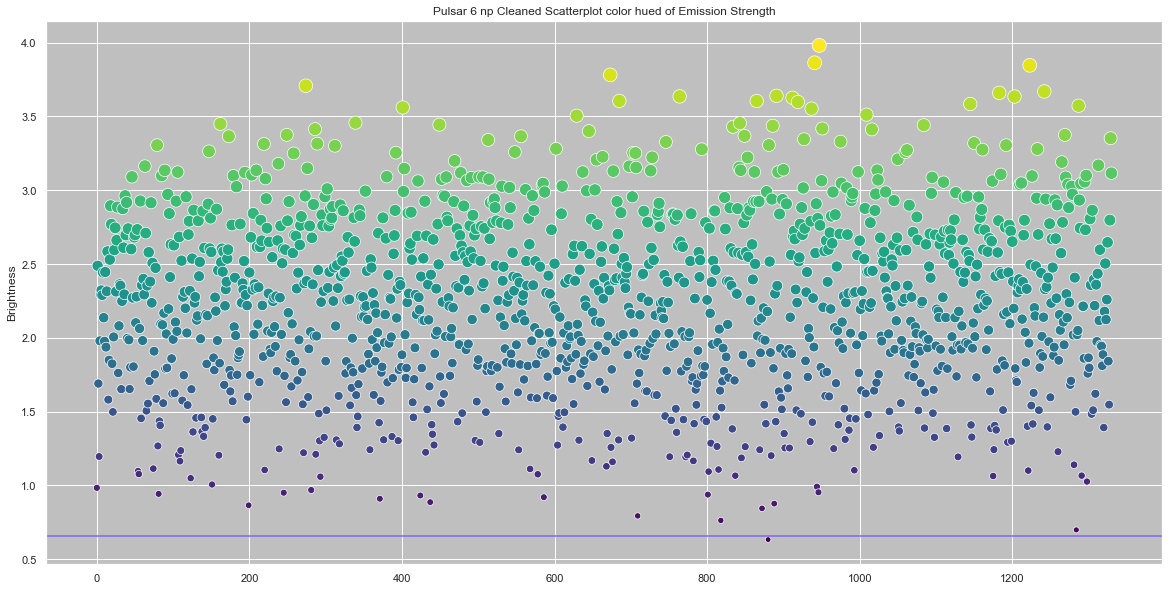

In [75]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6npcleaned.Brightness.values
ax = sns.scatterplot(data=pulsar6npcleaned["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6589028, ls='-',c='mediumslateblue')

In [76]:
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness > 0.6589028)]))
print(len(pulsar6npcleaned[(pulsar6npcleaned.Brightness < 0.6589028)]))

1329
1


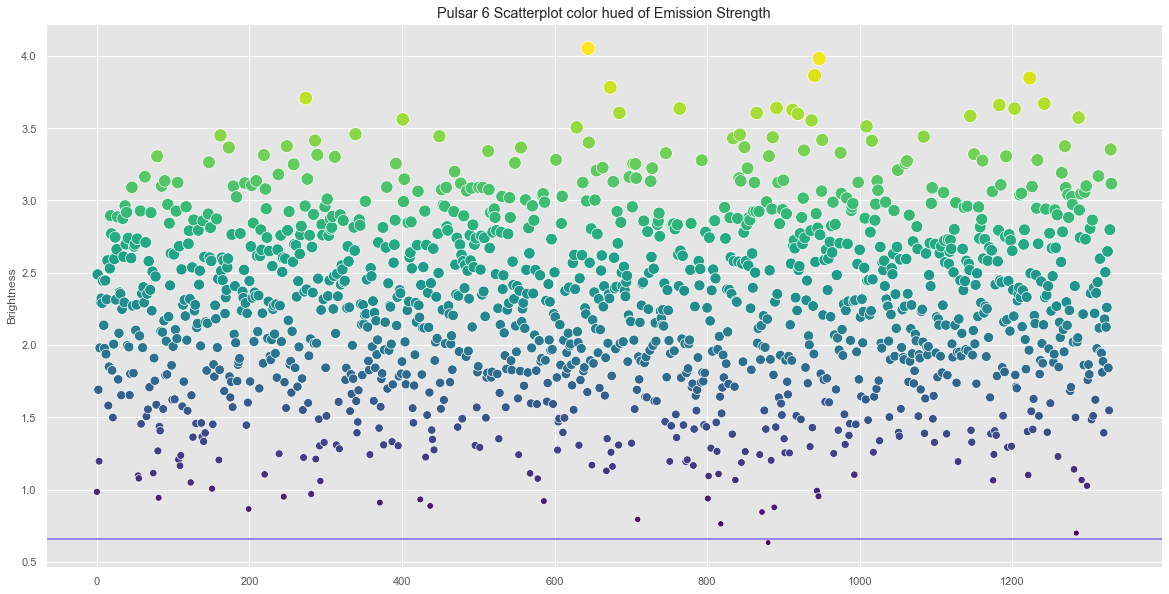

In [77]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = pulsar6.Brightness.values
plt.style.use('ggplot')
ax = sns.scatterplot(data=pulsar6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 Scatterplot color hued of Emission Strength')
ax= plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')

In [78]:
print(len(pulsar6[(pulsar6.Brightness > 0.6589028)]))
print(len(pulsar6[(pulsar6.Brightness < 0.6589028)]))

1330
1


In [79]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = pulsar6.Brightness.values
#ax = plt.axhline( y=0.65829515, ls='-',c='mediumslateblue')
#ax = sns.swarmplot(data=pulsar6["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')


In [80]:
#plt.figure(figsize=(20,10))
#sns.set_style("darkgrid", {"axes.facecolor": ".75"})
#strength = pulsar6npcleaned.Brightness.values
#ax = sns.swarmplot(data=pulsar6npcleaned["Brightness"]).set_title('Pulsar 6 np cleaned Swarm plot of Emission Strength')
#ax = plt.axhline( y=0.6589028, ls='-', c='mediumslateblue')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 Brightness')

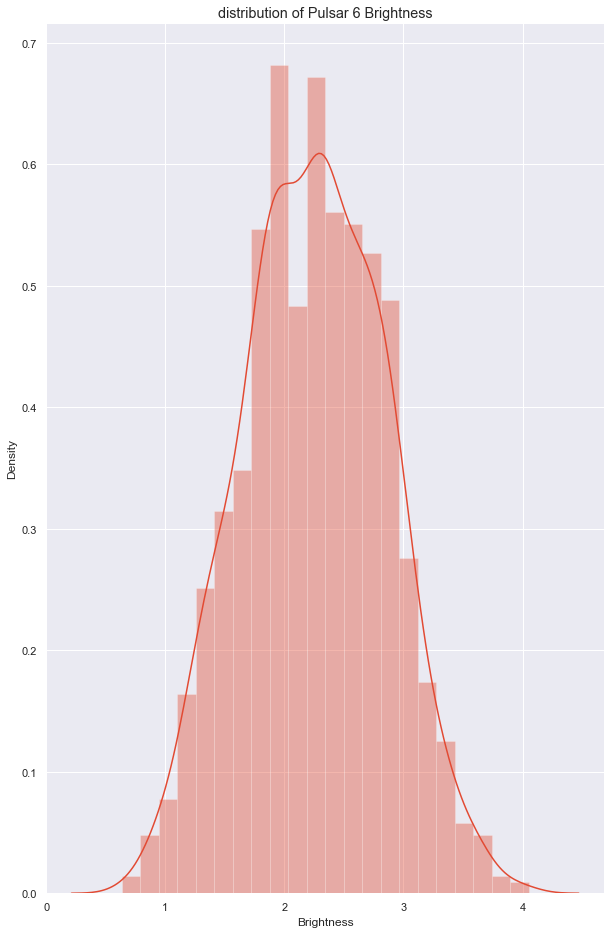

In [81]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("distribution of Pulsar 6 Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned Brightness')

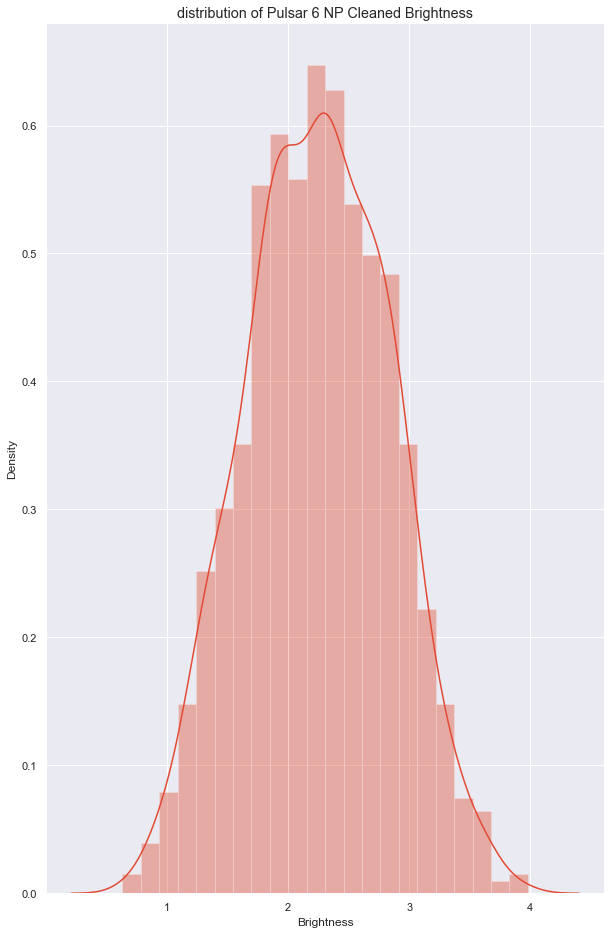

In [82]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Brightness)
plt.title("distribution of Pulsar 6 NP Cleaned Brightness")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 NP Cleaned binary assignments')

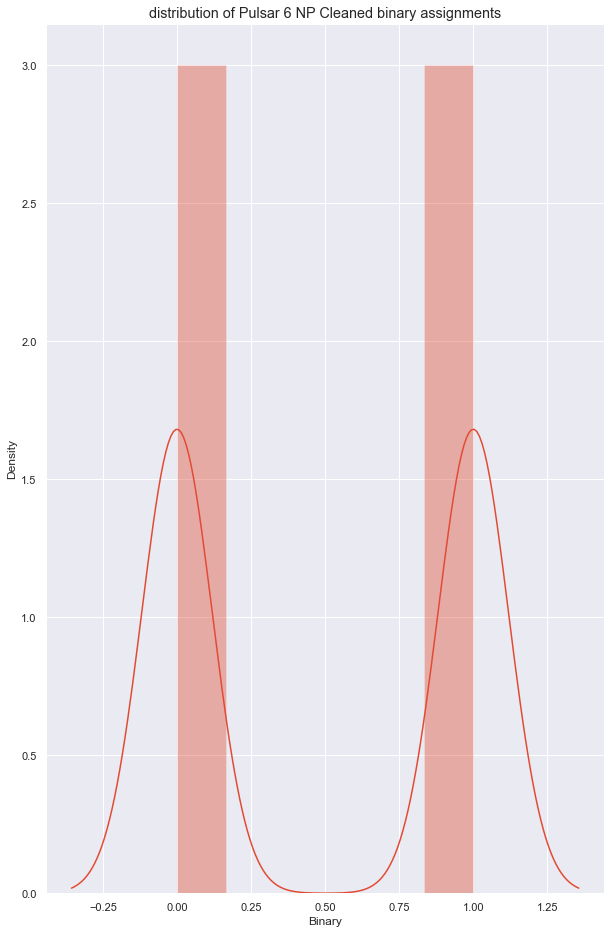

In [83]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6npcleaned.Binary)
plt.title("distribution of Pulsar 6 NP Cleaned binary assignments")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of Pulsar 6 binary assignments')

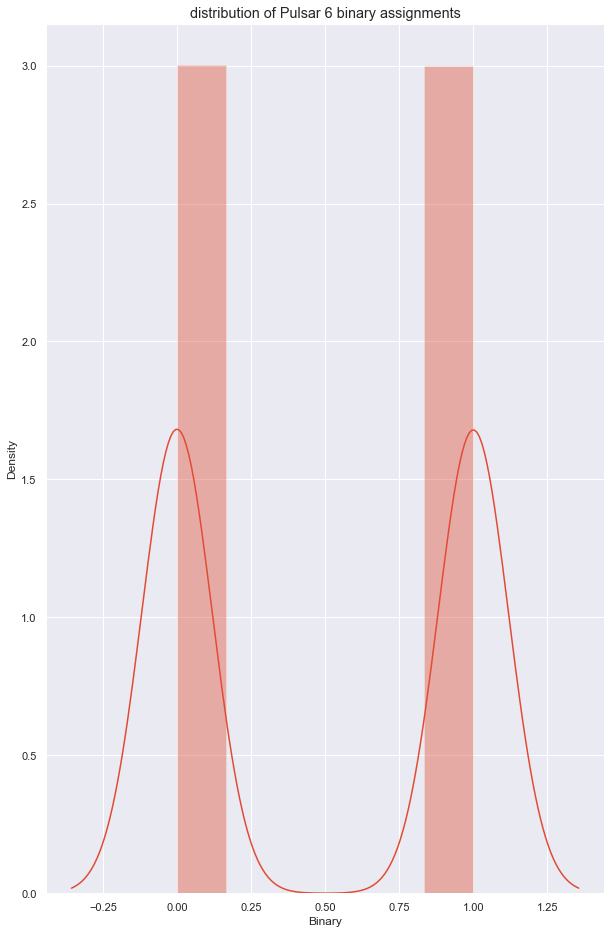

In [84]:
plt.figure(figsize=(10, 16))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Binary)
plt.title("distribution of Pulsar 6 binary assignments")

# Preliminary runs test
### Math Logic

$$ Z = {R - \tilde{R} \over s_{R}} $$

$$ \tilde{R} = {2_{n1 n2} \over n1 + n2} + 1 $$

$$  s^2_{R} = {2_{n1n2}(2{n1n2-n1-n2}) \over (n1+n2)^2(n1+n2-1) }$$

link to resource: https://www.geeksforgeeks.org/runs-test-of-randomness-in-python/

$ Z_{critical} = 1.96 $ as the confidence interval level of 95% thus this is a 2 tailed test. If the probability as corrosponding to this confidence interval $ H_{null} $ will be rejected as it is not statistically significant as denoted by $|Z| > Z_{critical} $

There is also code attempting to change it from a z-score probability to a P-score for ease of understanding and clarity.

# FUNCTION CODE FOR RUNS TEST

In [85]:
# MUST BE PASSED A LIST AND A INT/FLOAT 


def runsTest(data, dataMedian):
    runs = 0
    above = 0
    below = 0

    for i in range(len(data)):
        if(data[i] >= dataMedian and data[i-1] < dataMedian) or (data[i] < dataMedian and data[i-1] >= dataMedian):
            runs += 1
        
        if(data[i] >= dataMedian):
            above += 1
        
        else:
            below += 1
    
    R = ((2*above*below)/(above+below))+1
    #sdevTemp = (2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1))
    #sdevTemp = (2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)*2)*(n1+n2-1))
    Sdev = math.sqrt((2*above*below*(2*above*below-above-below))/(((above+below)**2)*(above+below-1)))   

    float(Sdev)
    float(R)
    float(runs)
    z = (runs-R)/Sdev
    return z     

In [86]:
binaryData1 = pulsar6['Binary'].tolist()
print("pulsar6 original: ",binaryData1)

binaryData1nooutlier = pulsar6npcleaned['Binary'].tolist()
print("\n pulsar6 original: ", binaryData1nooutlier)

pulsar6 original:  [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [87]:
#print("Brightness Median Test")
#Zscore = abs(runsTest(binaryData1, medianpulse6))
#Pval = stats.norm.sf(abs(Zscore))*2
#print('Z Statistic is: ', Zscore)
#print('P Value is : ', Pval)

#if(Zscore >= 1.96):
    #print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

#if(Pval <= 0.05):
    #print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

#print("Binary Median Test")
#binarymedian1 = pulsar6["Binary"].median()

#Zscore = abs(runsTest(binaryData1, binarymedian1))
#Pval = stats.norm.sf(abs(Zscore))*2
#print('Z Statistic is: ', Zscore)
#print('P Value is : ', Pval)

#if(Zscore >= 1.96):
    #print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

#if(Pval <= 0.05):
    #print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')


#print("Removed outliers from dataset")
#Zscore = abs(runsTest(binaryData1nooutlier, median))
#Pval = stats.norm.sf(abs(Zscore))*2
#print('Z Statistic is: ', Zscore)
#print('P Value is : ', Pval)

#if(Zscore >= 1.96):
    #print('We reject the null Hypotheses as the Zscore greater than 1.96. Thus not statistically significant.')

#if(Pval <= 0.05):
    #print('We reject the null Hypotheses as the P-value is less than 0.05%. Thus not statistically significant.')

# Analysis of the preliminary data analysis

We can see here through our printouts the value of both Z Statistic based on the above Runs Test of Randomness and the approximate correlative P-value.

If the conditional prints are not activated it meants there is no statistical significance to reject the $H_{null}$

$ H_{null} $ is where the numbers are randomly generated and sequenced
-
$ H_{alt} $ is where the numbers are not randomly generated or sequenced
-


Further testing can be done with more variety of datasets with pythonic libraries and R librariest such as NIST and Rrandtest (placeholders cant remember their names)


# Below we begin autocorrelation and autocovariance analysis

To get started with this I am playing around with guide from: https://towardsdatascience.com/a-step-by-step-guide-to-calculating-autocorrelation-and-partial-autocorrelation-8c4342b784e8

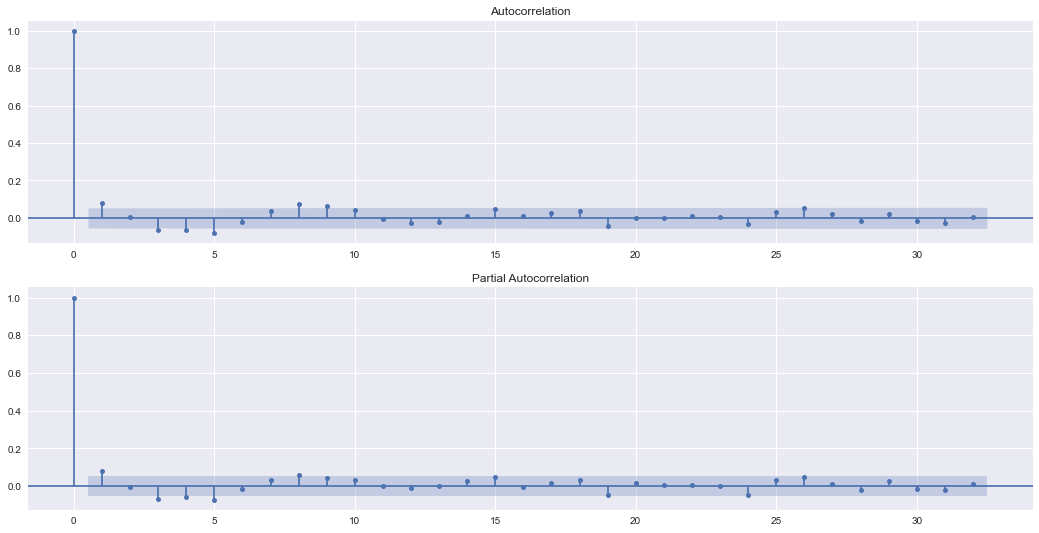

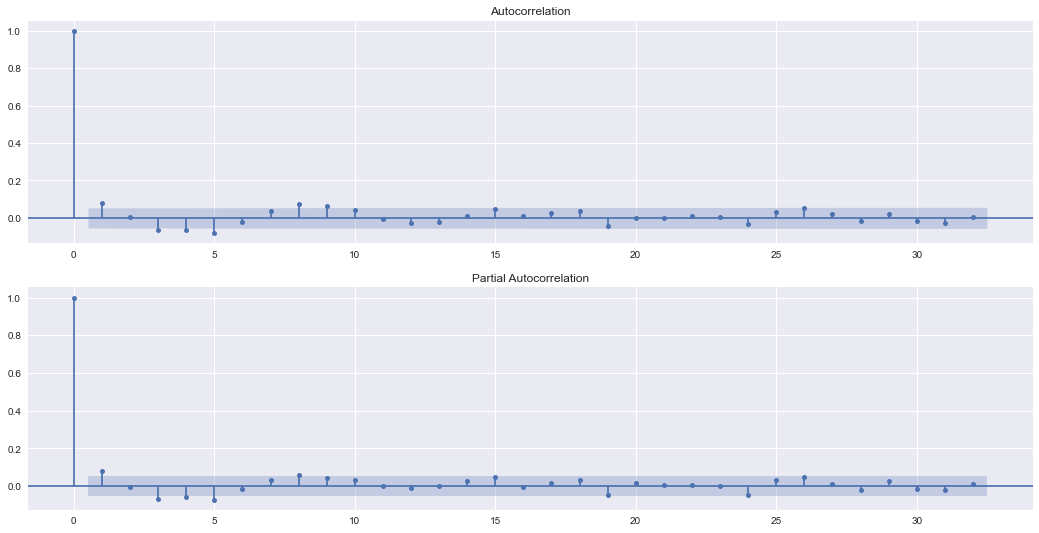

In [88]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (18, 9)

fig, ax = plt.subplots(2,1)

plot_acf(pulsar6['Brightness'], ax=ax[0])
plot_pacf(pulsar6['Brightness'], ax=ax[1], method="ols")

In [89]:
acf(pulsar6['Brightness'], nlags=10)

c:\Users\oxlay\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.08095517,  0.00412699, -0.06721578, -0.06554554,
       -0.07977771, -0.02053543,  0.03766276,  0.07611705,  0.06106126,
        0.04441705])

In [90]:
acfpulsar6 = pd.DataFrame()
for lag in range(0,11):
    acfpulsar6[f"B_lag_{lag}"] = pulsar6['Brightness'].shift(lag)


acfpulsar6

,B_lag_0,B_lag_1,B_lag_2,B_lag_3,B_lag_4,B_lag_5,B_lag_6,B_lag_7,B_lag_8,B_lag_9,B_lag_10
0,0.984043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.487928,0.984043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.690295,2.487928,0.984043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.196142,1.690295,2.487928,0.984043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.979783,1.196142,1.690295,2.487928,0.984043,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1326,1.842016,2.646750,2.258860,2.123736,2.503202,2.178636,1.392491,1.886326,1.810641,1.943447,1.950708
1327,1.547695,1.842016,2.646750,2.258860,2.123736,2.503202,2.178636,1.392491,1.886326,1.810641,1.943447
1328,2.797312,1.547695,1.842016,2.646750,2.258860,2.123736,2.503202,2.178636,1.392491,1.886326,1.810641
1329,3.351977,2.797312,1.547695,1.842016,2.646750,2.258860,2.123736,2.503202,2.178636,1.392491,1.886326


In [91]:
acfpulsar6.corr()["B_lag_0"].values

array([ 1.        ,  0.0811623 ,  0.00414645, -0.06751767, -0.06595236,
       -0.08029629, -0.02066581,  0.0379259 ,  0.07664111,  0.06149054,
        0.04473245])

### Getting every 5th as per the auto correlation
### Creating a new set of discrete 100 sets and examining them specifically
### Further Random testing to move into extensive testing

#### Getting every 5th as per the auto correlation

In [92]:
held5ths = pulsar6[pulsar6.index % 5 == 0]
held5ths

,Pulse Number,Brightness,Uncertainty,Binary
0,1,0.984043,0.053831,0
5,6,2.297645,0.054210,1
10,11,1.976790,0.037551,0
15,16,1.581452,0.030372,0
20,21,1.824490,0.036531,0
...,...,...,...,...
1310,1311,2.360064,0.034759,1
1315,1316,2.596850,0.048041,1
1320,1321,1.392491,0.030957,0
1325,1326,2.646750,0.036691,1


In [93]:
medianheld5ths = held5ths["Brightness"].median()
medianheld5ths

2.256816

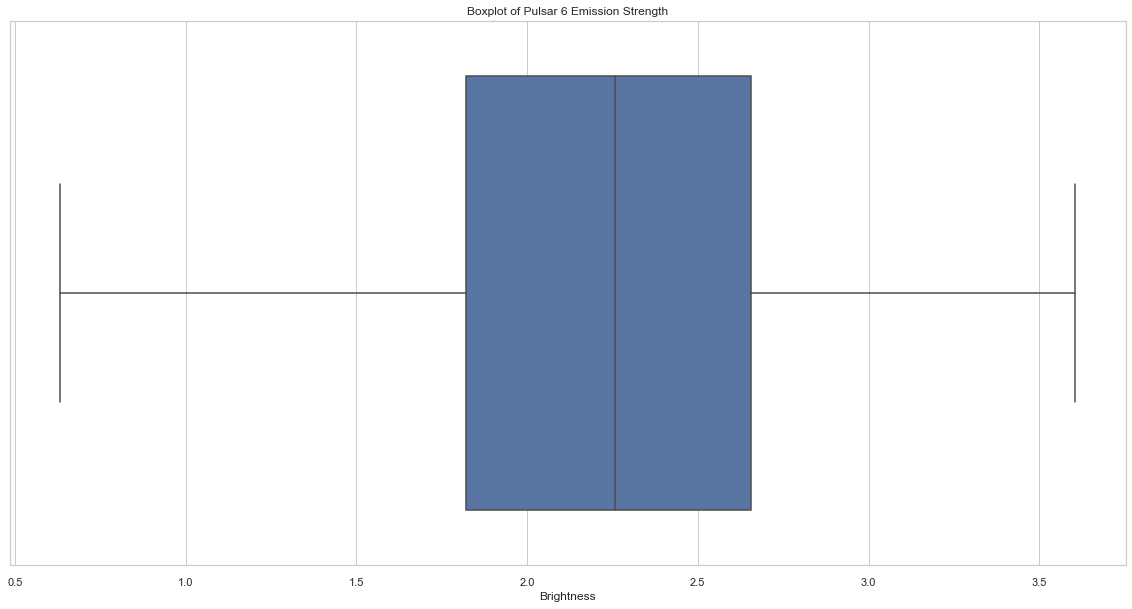

In [94]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=held5ths["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

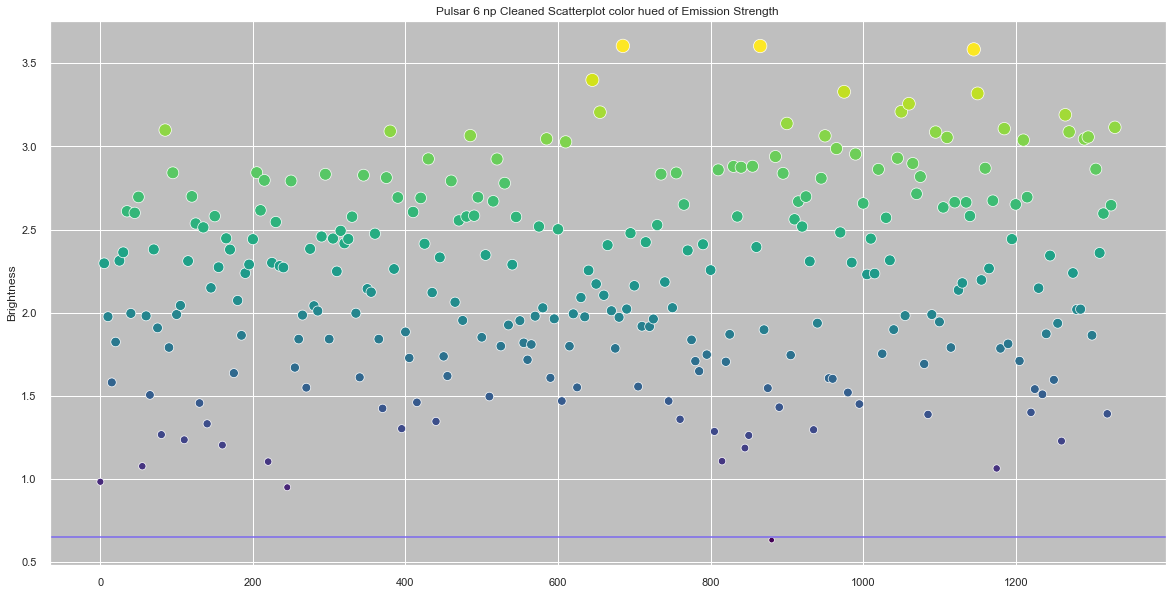

In [95]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = sns.scatterplot(data=held5ths["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')

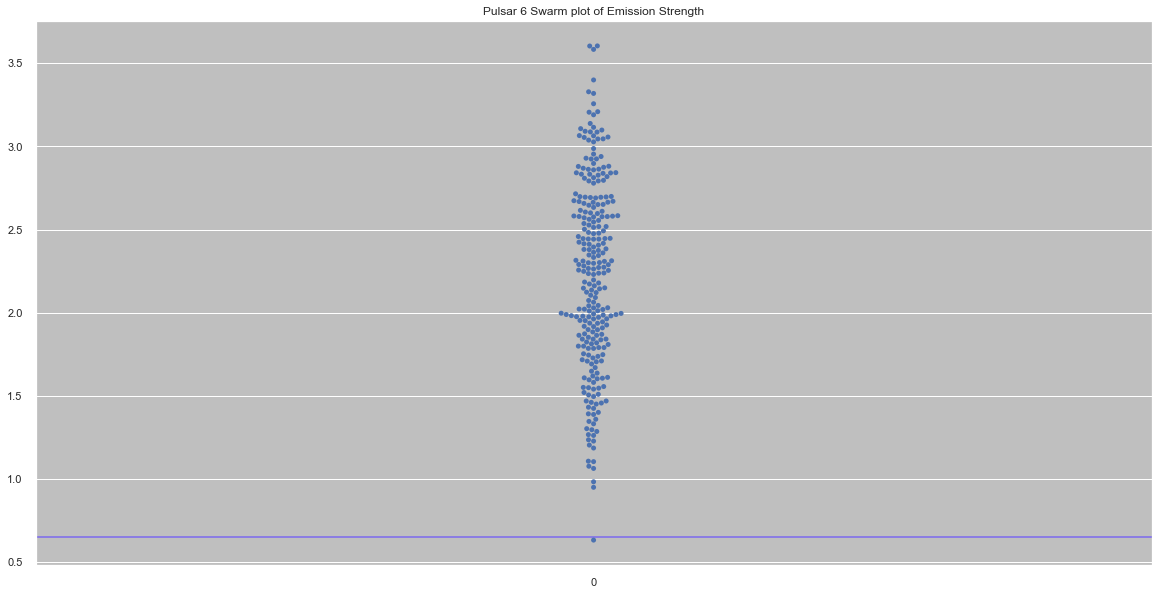

In [96]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = held5ths.Brightness.values
ax = plt.axhline( y=0.6508051, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=held5ths["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [97]:
print(len(held5ths[(held5ths.Brightness > 0.6508051)]))
print(len(held5ths[(held5ths.Brightness < 0.6508051)]))

266
1


#### isolating every 100 rows into discrete sets.

In [98]:
size = 100
N = int(len(pulsar6)/size)
pulsarsubframes = [pulsar6.iloc[i*size:(i+1)*size].copy() for i in range(N+1)]
#pulsarsubframes[-1]

frame1 = pulsarsubframes[0]
frame2 = pulsarsubframes[1]
frame3 = pulsarsubframes[2]
frame4 = pulsarsubframes[3]
frame5 = pulsarsubframes[4]
frame6 = pulsarsubframes[5]
frame7 = pulsarsubframes[6]

medianframe1 = frame1["Brightness"].median()
print("Median of Pulsar6: ", medianframe1)
frame1['Binary'] = np.where(frame1['Brightness'] > 0.6589028, 1, 0)

medianframe2 = frame2["Brightness"].median()
print("Median of Pulsar6: ", medianframe2)
frame2['Binary'] = np.where(frame2['Brightness'] > 0.6589028, 1, 0)

medianframe3 = frame3["Brightness"].median()
print("Median of Pulsar6: ", medianframe3)
frame3['Binary'] = np.where(frame3['Brightness'] > 0.6589028, 1, 0)

medianframe4 = frame4["Brightness"].median()
print("Median of Pulsar6: ", medianframe4)
frame4['Binary'] = np.where(frame4['Brightness'] > 0.6589028, 1, 0)

medianframe5 = frame5["Brightness"].median()
print("Median of Pulsar6: ", medianframe5)
frame5['Binary'] = np.where(frame5['Brightness'] > 0.6589028, 1, 0)

medianframe6 = frame6["Brightness"].median()
print("Median of Pulsar6: ", medianframe6)
frame6['Binary'] = np.where(frame6['Brightness'] > 0.6589028, 1, 0)

medianframe7 = frame7["Brightness"].median()
print("Median of Pulsar6: ", medianframe7)
frame7['Binary'] = np.where(frame7['Brightness'] > 0.6589028, 1, 0)

Median of Pulsar6:  2.274924
Median of Pulsar6:  2.226635
Median of Pulsar6:  2.3356045
Median of Pulsar6:  2.2360990000000003
Median of Pulsar6:  2.3103569999999998
Median of Pulsar6:  2.2714749999999997
Median of Pulsar6:  2.1997720000000003


In [99]:
framebinary = []

In [100]:
print(frame1)

storeover1 = len(frame1[(frame1.Brightness > frame1["Brightness"].median())])
storeunder1 = len(frame1[(frame1.Brightness < frame1["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

    Pulse Number  Brightness  Uncertainty  Binary
0              1    0.984043     0.053831       1
1              2    2.487928     0.048796       1
2              3    1.690295     0.025639       1
3              4    1.196142     0.039539       1
4              5    1.979783     0.041460       1
..           ...         ...          ...     ...
95            96    2.841772     0.034724       1
96            97    2.411585     0.041171       1
97            98    2.632570     0.070025       1
98            99    1.859452     0.028663       1
99           100    1.621589     0.030229       1

[100 rows x 4 columns]


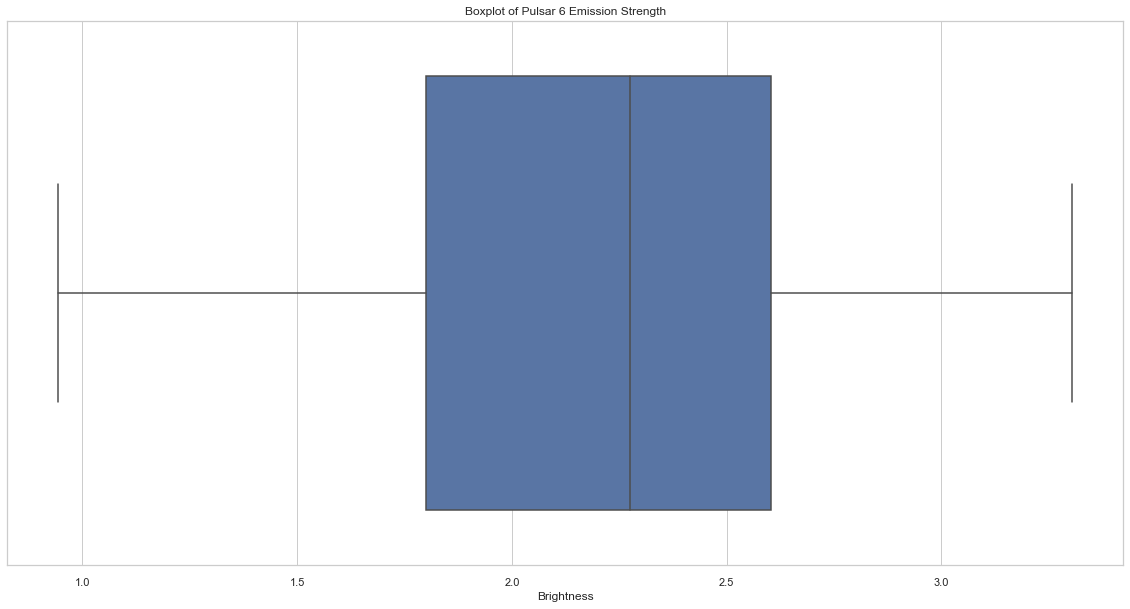

In [101]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame1["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

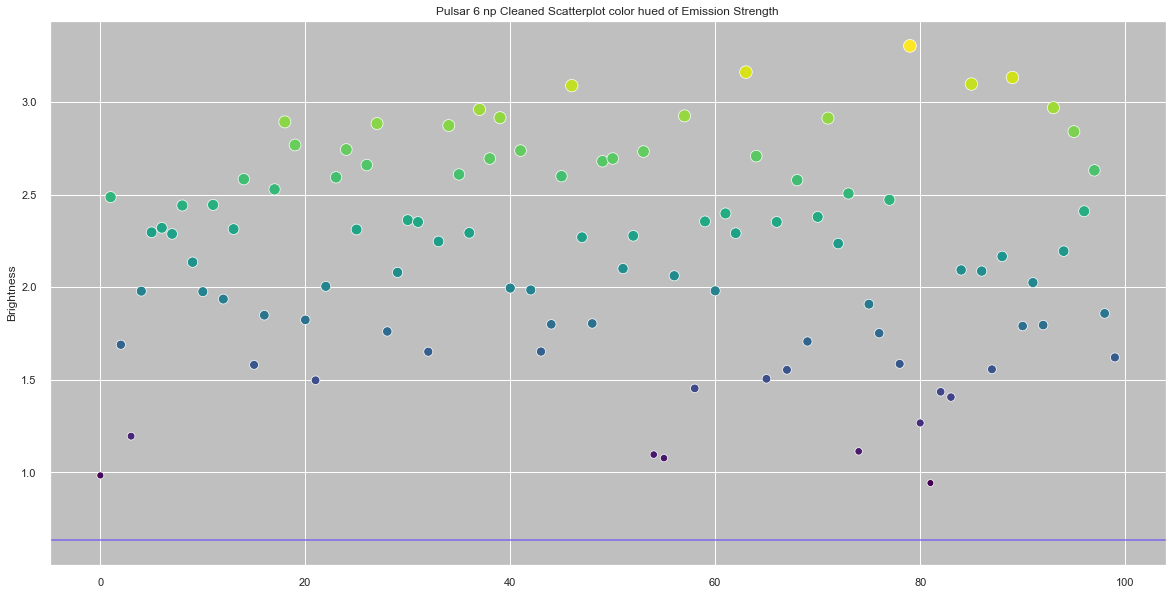

In [102]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = sns.scatterplot(data=frame1["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')

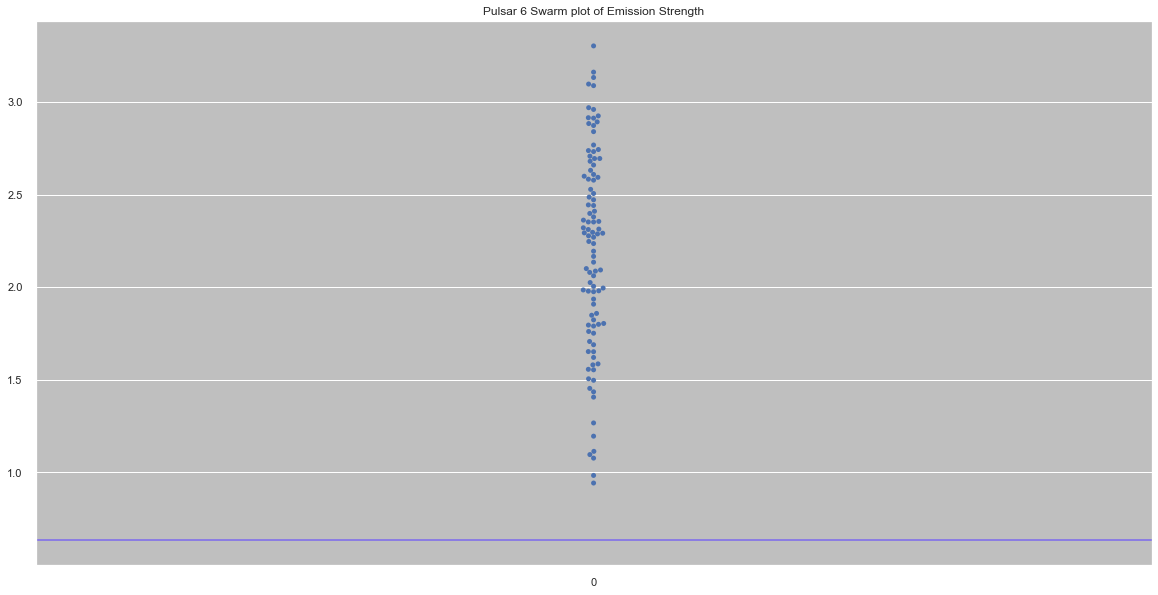

In [103]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame1.Brightness.values
ax = plt.axhline( y=0.63457545, ls='-',c='mediumslateblue')
ax = sns.swarmplot(data=frame1["Brightness"], c="blue").set_title('Pulsar 6 Swarm plot of Emission Strength')

In [104]:
print(frame2)

storeover1 = len(frame2[(frame2.Brightness > frame2["Brightness"].median())])
storeunder1 = len(frame2[(frame2.Brightness < frame2["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
100           101    1.989670     0.017962       1
101           102    2.626921     0.066951       1
102           103    1.624522     0.021458       1
103           104    2.106165     0.043770       1
104           105    2.925817     0.032757       1
..            ...         ...          ...     ...
195           196    2.290515     0.025807       1
196           197    1.445586     0.040338       1
197           198    2.218662     0.025017       1
198           199    1.601570     0.025426       1
199           200    0.865812     0.019161       1

[100 rows x 4 columns]


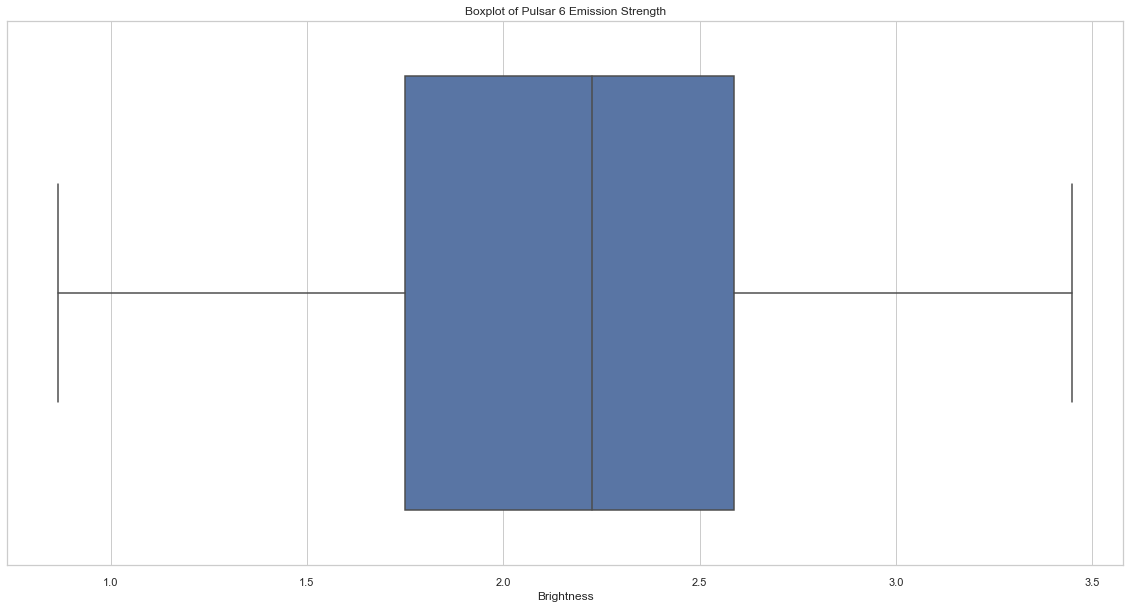

In [105]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame2["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

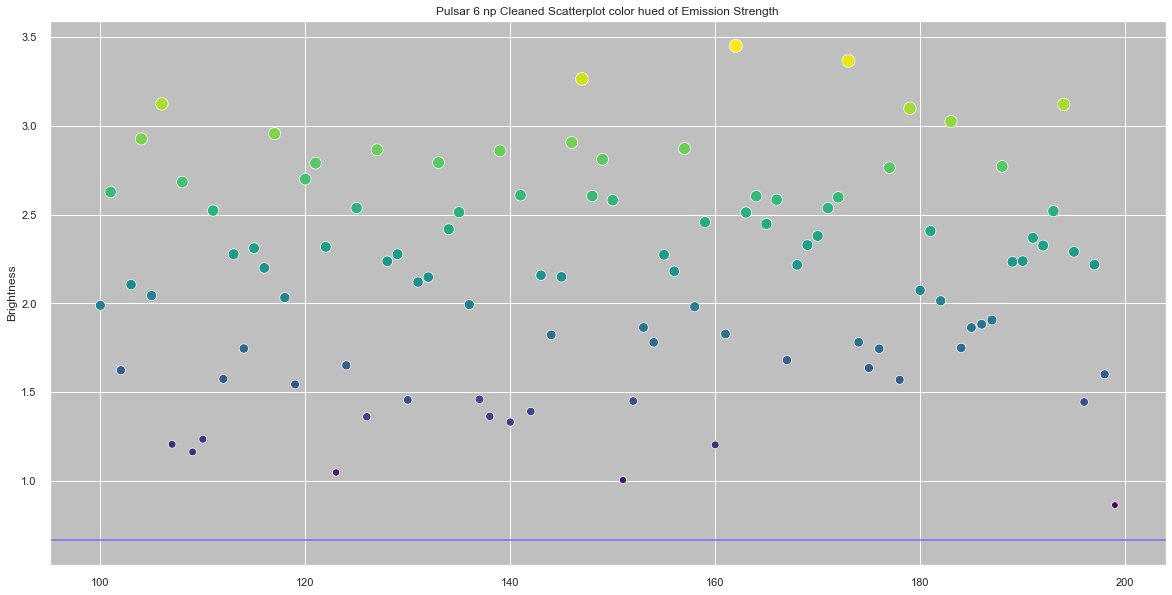

In [106]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame2.Brightness.values
ax = sns.scatterplot(data=frame2["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6688056, ls='-',c='mediumslateblue')

In [107]:
print(frame3)

storeover1 = len(frame3[(frame3.Brightness > frame3["Brightness"].median())])
storeunder1 = len(frame3[(frame3.Brightness < frame3["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
200           201    2.442587     0.057566       1
201           202    1.747254     0.031465       1
202           203    2.681042     0.048291       1
203           204    3.104009     0.052434       1
204           205    2.325749     0.050299       1
..            ...         ...          ...     ...
295           296    2.833012     0.027843       1
296           297    2.759990     0.037434       1
297           298    2.316148     0.020802       1
298           299    1.325980     0.046608       1
299           300    2.955748     0.064449       1

[100 rows x 4 columns]


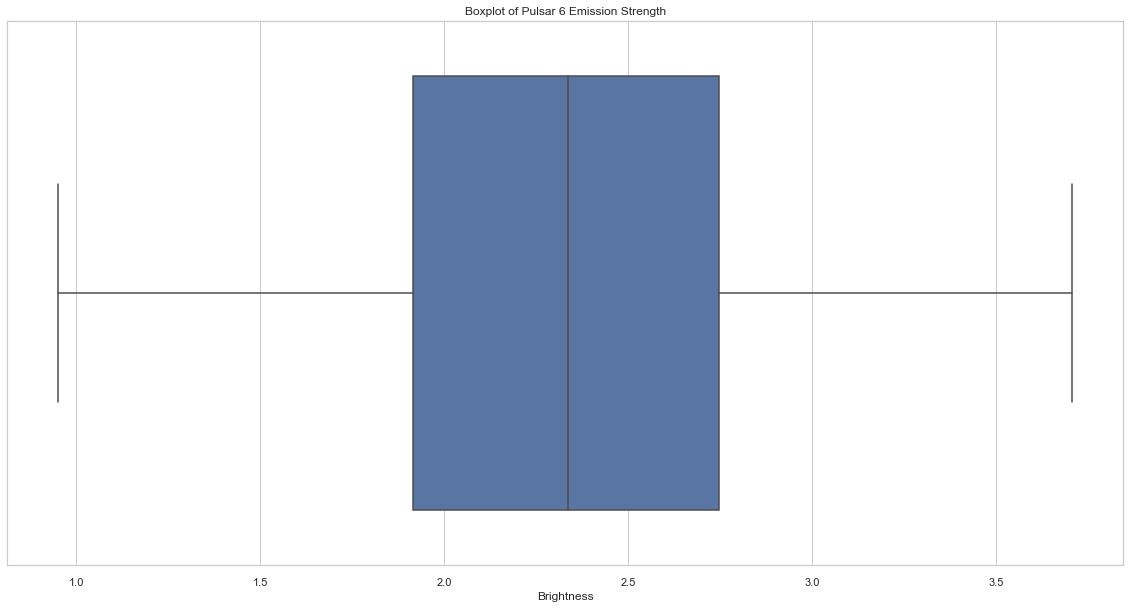

In [108]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame3["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

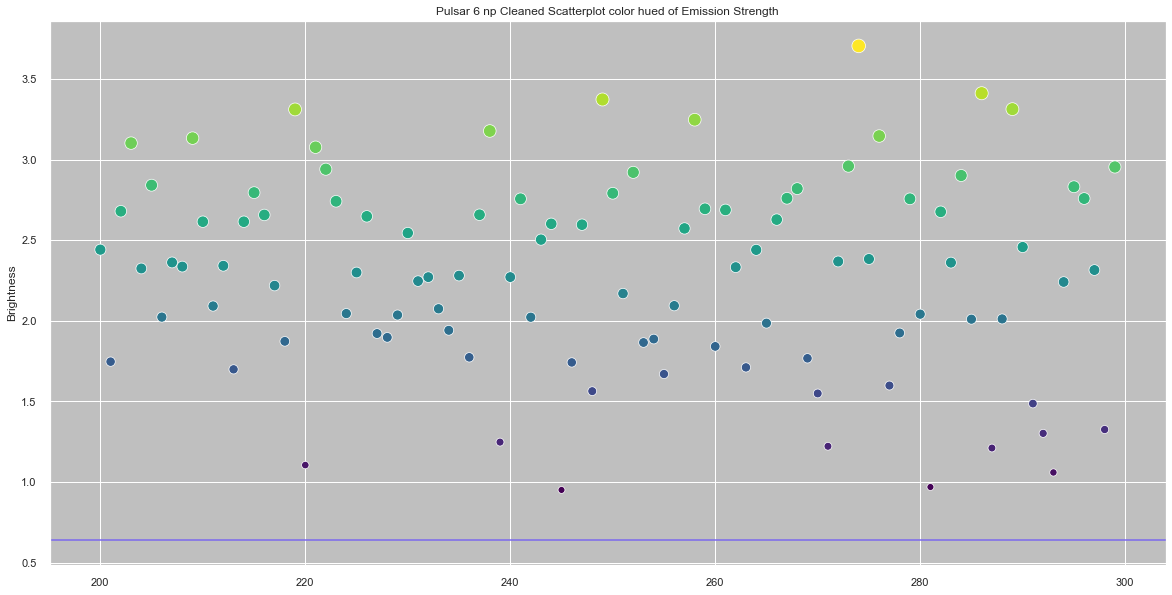

In [109]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame3.Brightness.values
ax = sns.scatterplot(data=frame3["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.63955675, ls='-',c='mediumslateblue')

In [110]:
print(frame4)

storeover1 = len(frame4[(frame4.Brightness > frame4["Brightness"].median())])
storeunder1 = len(frame4[(frame4.Brightness < frame4["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
300           301    1.842112     0.024696       1
301           302    1.509414     0.017997       1
302           303    3.008759     0.070265       1
303           304    2.338475     0.043725       1
304           305    2.756827     0.036111       1
..            ...         ...          ...     ...
395           396    1.303410     0.015728       1
396           397    1.783647     0.021946       1
397           398    2.379698     0.035664       1
398           399    2.357981     0.050628       1
399           400    1.801323     0.030178       1

[100 rows x 4 columns]


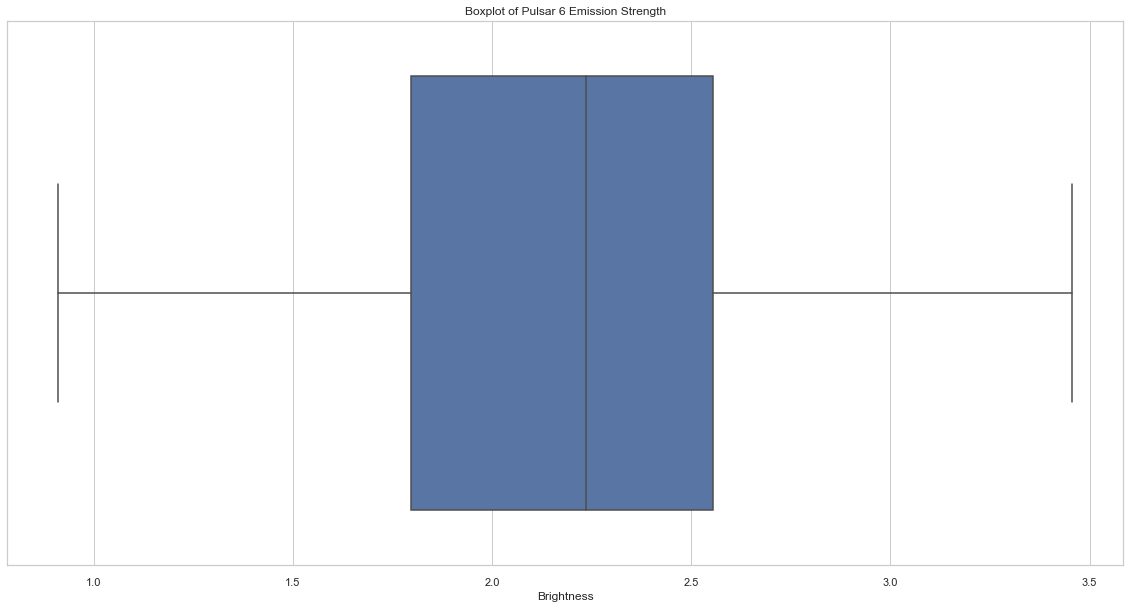

In [111]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame4["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

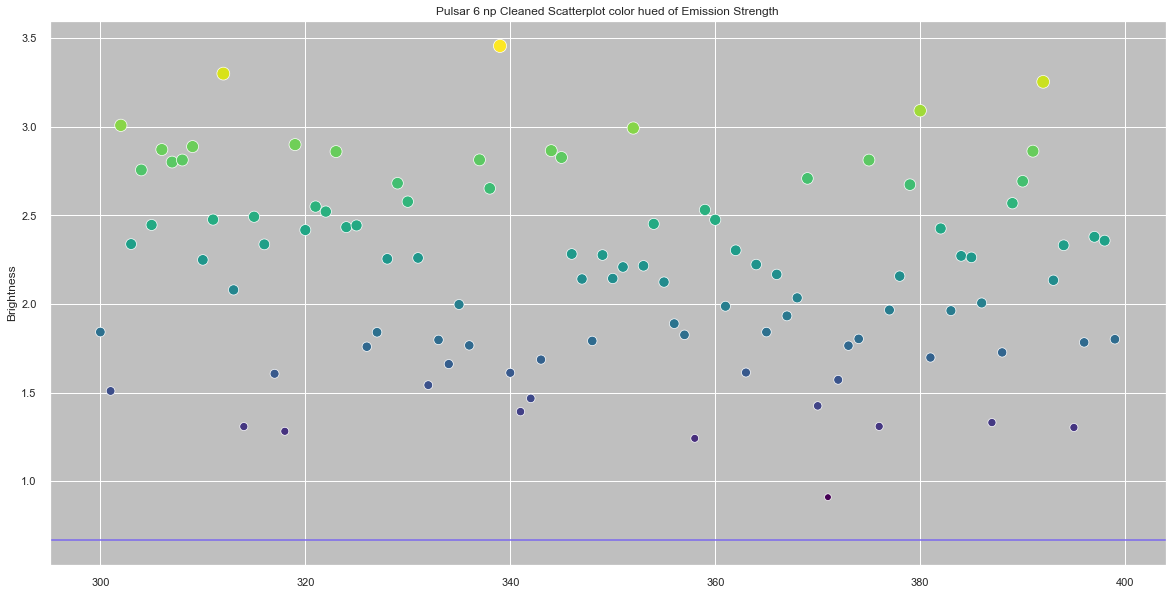

In [112]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame4.Brightness.values
ax = sns.scatterplot(data=frame4["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.66777675, ls='-',c='mediumslateblue')

In [113]:
print(frame5)

storeover1 = len(frame5[(frame5.Brightness > frame5["Brightness"].median())])
storeunder1 = len(frame5[(frame5.Brightness < frame5["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
400           401    1.885037     0.028230       1
401           402    3.560211     0.042255       1
402           403    2.991296     0.071352       1
403           404    3.146375     0.075308       1
404           405    2.021413     0.040419       1
..            ...         ...          ...     ...
495           496    2.694789     0.040954       1
496           497    1.305247     0.028760       1
497           498    2.738183     0.052120       1
498           499    1.568219     0.045187       1
499           500    1.812189     0.048465       1

[100 rows x 4 columns]


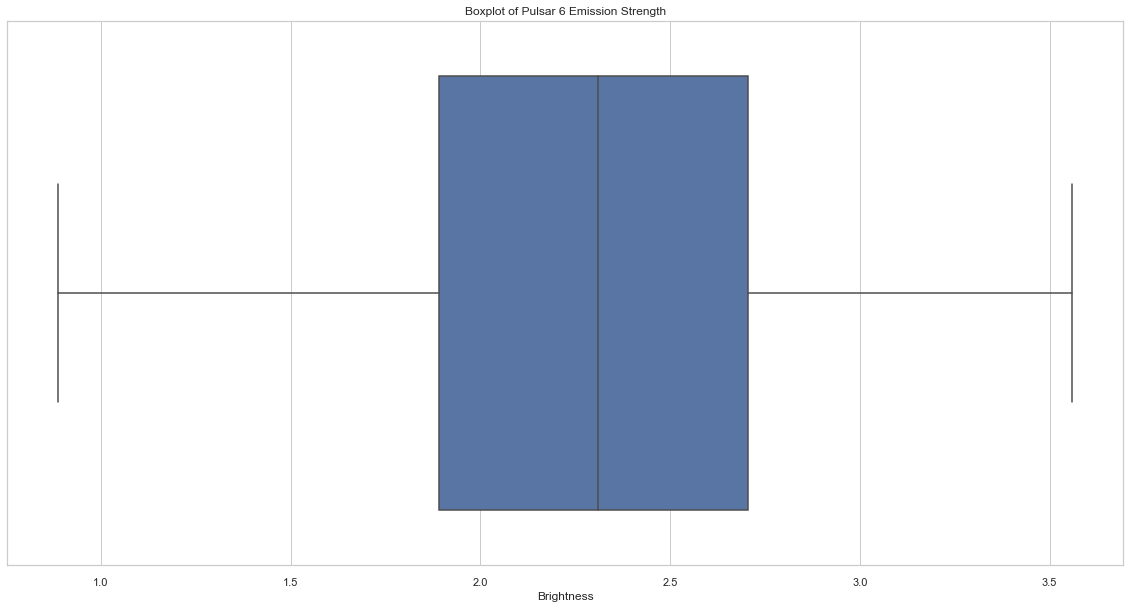

In [114]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame5["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

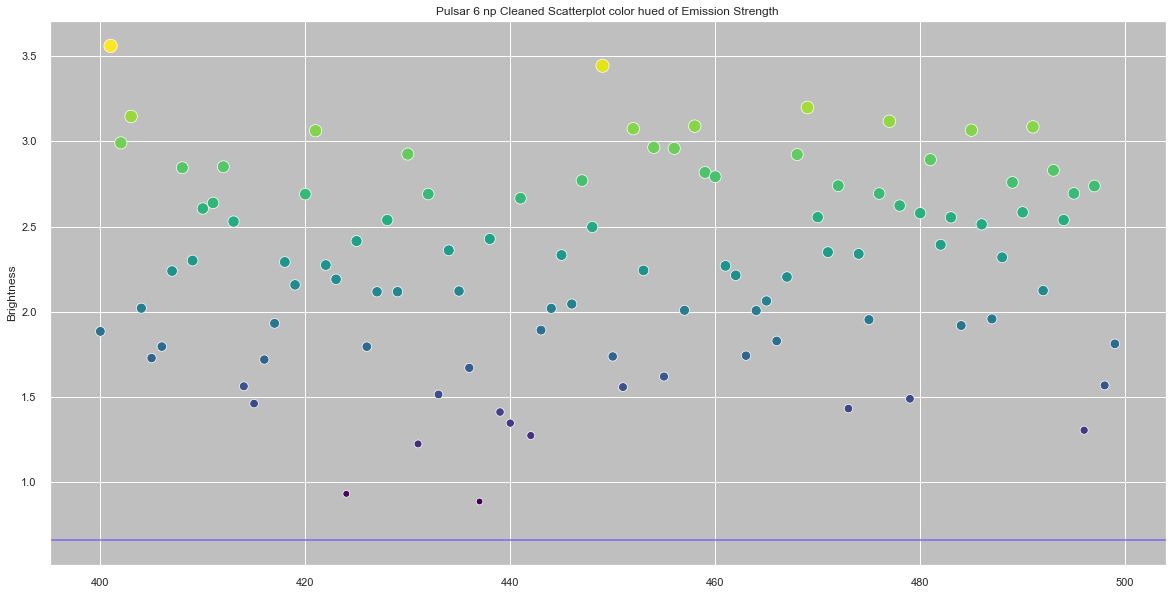

In [115]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame5.Brightness.values
ax = sns.scatterplot(data=frame5["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6605900499999999, ls='-',c='mediumslateblue')

In [116]:
print(frame6)

storeover1 = len(frame6[(frame6.Brightness > frame6["Brightness"].median())])
storeunder1 = len(frame6[(frame6.Brightness < frame6["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
500           501    1.852762     0.018677       1
501           502    3.089495     0.037738       1
502           503    1.292071     0.023223       1
503           504    2.520879     0.032320       1
504           505    2.753936     0.062994       1
..            ...         ...          ...     ...
595           596    1.963821     0.074414       1
596           597    2.731900     0.048625       1
597           598    1.969493     0.036346       1
598           599    1.591757     0.031284       1
599           600    2.215511     0.039982       1

[100 rows x 4 columns]


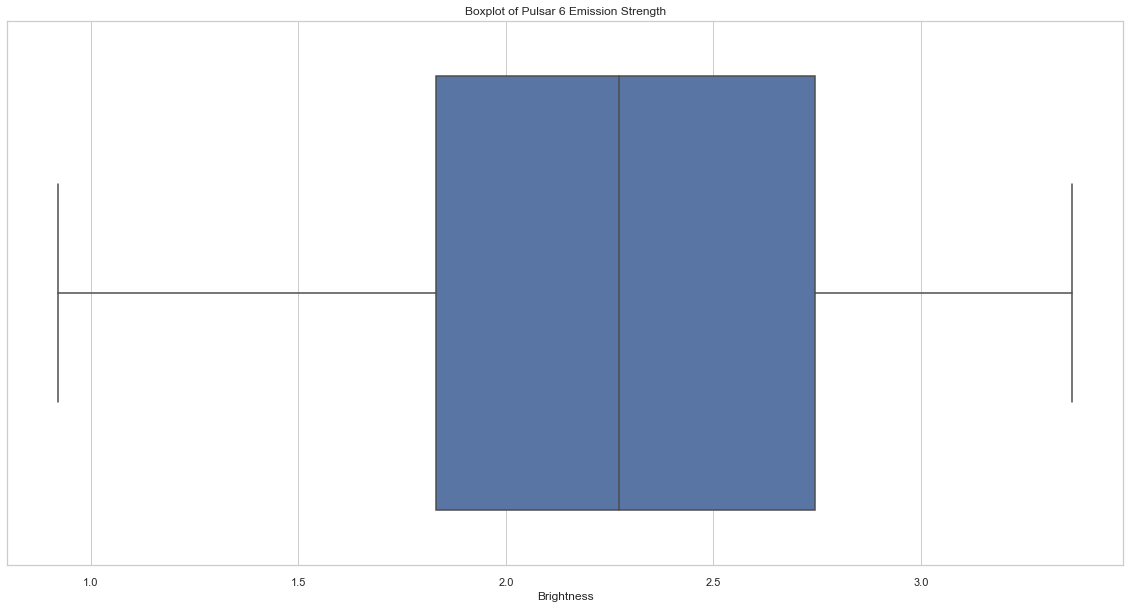

In [117]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame6["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

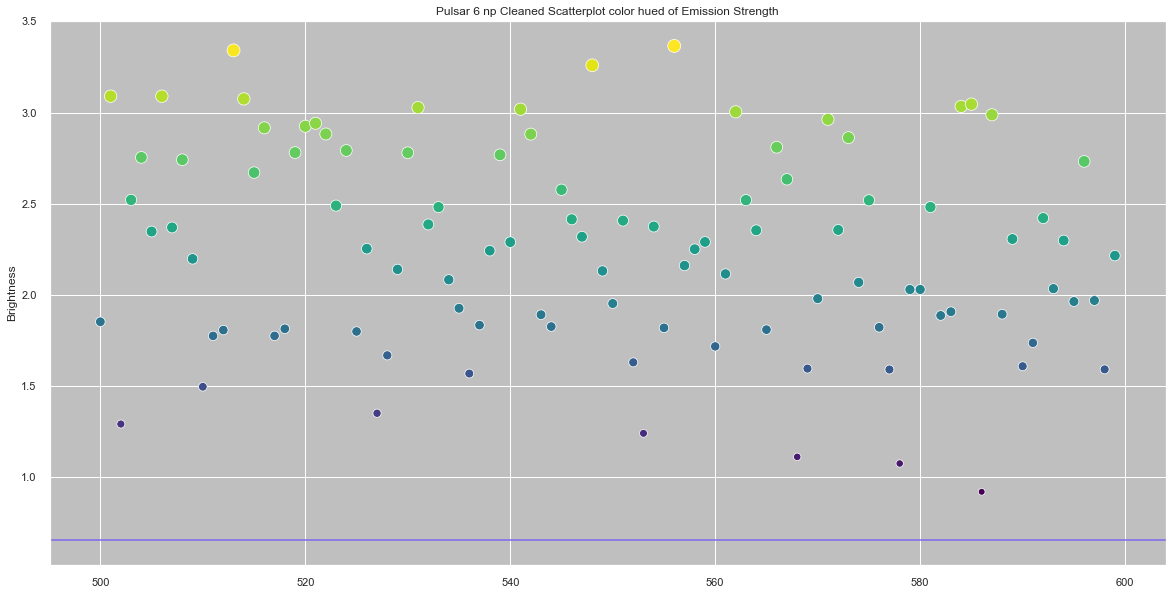

In [118]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame6.Brightness.values
ax = sns.scatterplot(data=frame6["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.65585835, ls='-',c='mediumslateblue')

In [119]:
print(frame7)

storeover1 = len(frame7[(frame7.Brightness > frame7["Brightness"].median())])
storeunder1 = len(frame7[(frame7.Brightness < frame7["Brightness"].median())])

if (storeover1 > storeunder1):
    framebinary.append(1)
else:
    framebinary.append(0)

     Pulse Number  Brightness  Uncertainty  Binary
600           601    2.502263     0.044764       1
601           602    2.193342     0.028606       1
602           603    3.280573     0.038773       1
603           604    1.775242     0.043112       1
604           605    1.273519     0.031908       1
..            ...         ...          ...     ...
695           696    2.478750     0.043687       1
696           697    1.884929     0.032679       1
697           698    2.206202     0.036117       1
698           699    3.161886     0.031958       1
699           700    2.166233     0.035864       1

[100 rows x 4 columns]


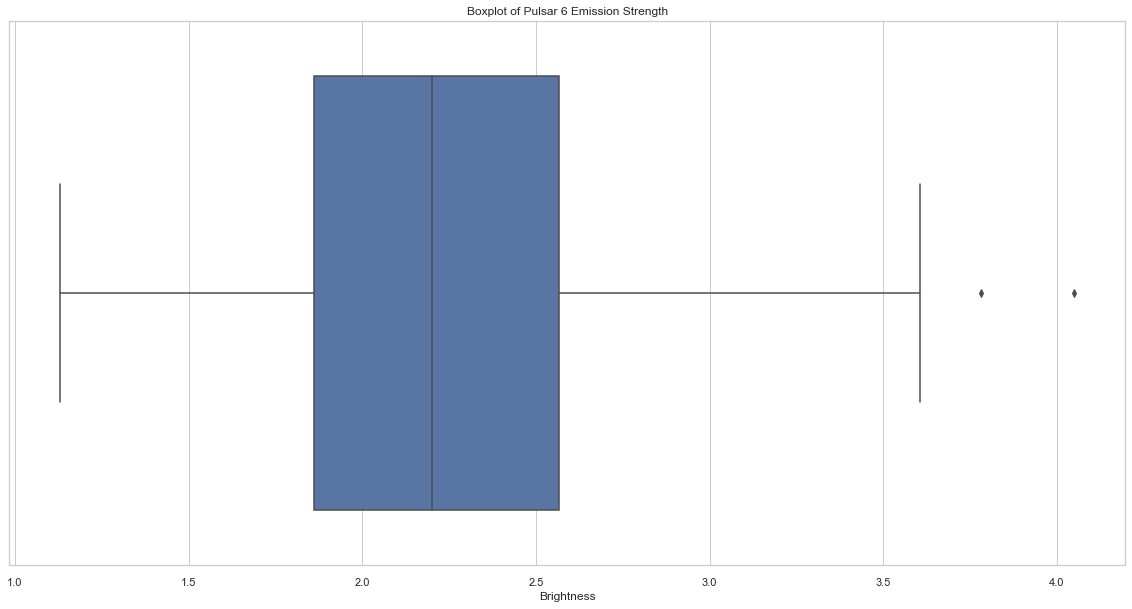

In [120]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=frame7["Brightness"]).set_title("Boxplot of Pulsar 6 Emission Strength")

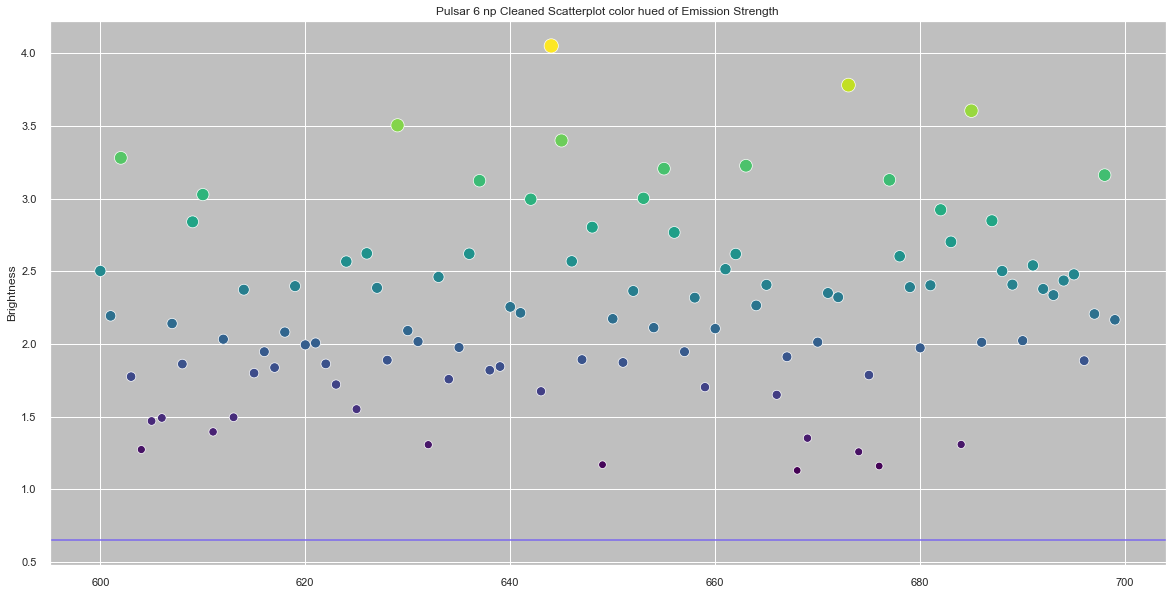

In [121]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".75"})
strength = frame7.Brightness.values
ax = sns.scatterplot(data=frame7["Brightness"], s= strength*50, c=strength, cmap="viridis", marker="o").set_title('Pulsar 6 np Cleaned Scatterplot color hued of Emission Strength')
ax = plt.axhline( y=0.6504474499999999, ls='-',c='mediumslateblue')

In [122]:
framebinary
#this didn't go to plan.

[0, 0, 0, 0, 0, 0, 0]

#### Randomness testing

In [123]:
np.savetxt(r'framebinarypulsar2.txt', framebinary, fmt='%d', delimiter='')
np.savetxt(r'every5thbinarypulsar2.txt', held5ths.Binary, fmt='%d', delimiter='')
np.savetxt(r'allpulsar2.txt', pulsar6.Binary, fmt='%d', delimiter='')
np.savetxt(r'npcleanedpulsar2.txt', pulsar6npcleaned.Binary, fmt='%d', delimiter='')